<a href="https://colab.research.google.com/github/RajabovX/MachineLearning/blob/main/supportvectormachine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# SupportVectorMachine"Underweight" or "Overweight"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv("accident.csv")

In [ ]:
df.dropna(inplace=True)

In [ ]:
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])
df["Helmet_Used"] = le.fit_transform(df["Helmet_Used"])
df["Seatbelt_Used"] = le.fit_transform(df["Seatbelt_Used"])

In [ ]:
X = df.drop(columns=["Survived"])
y = df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [ ]:
y_pred = svm_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.45

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.28      0.39        25
           1       0.38      0.73      0.50        15

    accuracy                           0.45        40
   macro avg       0.51      0.51      0.44        40
weighted avg       0.54      0.45      0.43        40



In [ ]:
pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train)
X_test_2D = pca.transform(X_test)

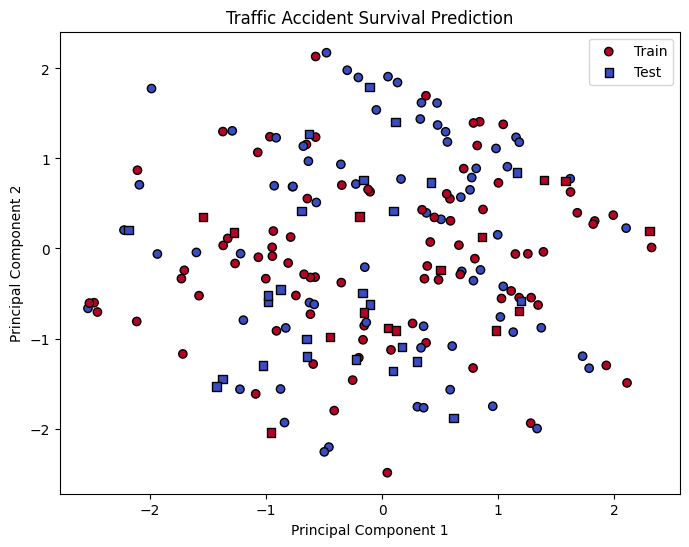

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train_2D[:, 0], X_train_2D[:, 1], c=y_train, cmap='coolwarm', marker='o', edgecolors='k', label='Train')
plt.scatter(X_test_2D[:, 0], X_test_2D[:, 1], c=y_test, cmap='coolwarm', marker='s', edgecolors='k', label='Test')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Traffic Accident Survival Prediction')
plt.legend()
plt.show()